<a href="https://colab.research.google.com/github/Jonny-T87/Dojo-Work/blob/main/Regression_Metrics_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jonny Tesfahun
- 06/28/22

All of the features and the target are continuous variables. 

For now, you do not need to do any cleaning to this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1. Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   We will limit our analysis to these three features.

2. Select columns for your feature matrix (X) and select PRICE for your target vector (y).

3. Split your data into train and test groups. Please use random number 42 for consistency!

4. Instantiate your model and fit it on the training set.

5. Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

6. Evaluate your model using mean absolute error (MAE).

7. Evaluate your model using mean squared error (MSE).  

8. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DojoBootCamp/Project Files/Boston_Housing_from_Sklearn.csv')

In [3]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


    1. Highest correlations are Rm (0.695), PTRATIO (-0.507), and LSTAT (-0.737). These will be used as feature matrix for the target PRICE.

In [4]:
#1.
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


In [6]:
corr = df.corr()

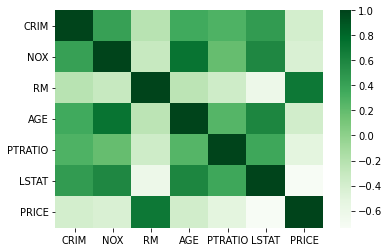

In [7]:
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens')

    2. 3. Rm, PTRATIO, and LSTAT columns for  feature matrix (X) and  PRICE for  target vector (y).

In [8]:
# split X and y
X = df.drop(columns=['PRICE','CRIM','NOX','AGE',])
y = df['PRICE']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    4. Instantiating the model and fitting it on the training set.

In [9]:
#Instantiate scaler and model
scaler = StandardScaler()
lin_reg = LinearRegression()
#Create Pipeline
lin_reg_pipe = make_pipeline(scaler,lin_reg)
#fit pipeline
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

    5. There is a difference between model performance on the training data vs the test data. Looks like there is a 0.0539 diffrence between training and test prediction. But overall for Median value of owner-occupied homes in $1000's both models can explain 63-68% of the variation in the target. 

In [10]:
#Create model predictions for training and test data
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [11]:
#Using Scikit-Learn to calculate r2 for me
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.6877966145058925
Model Testing R2: 0.6331590458194676


    6. Evaluating the model using mean absolute error (MAE). Shows both train and test models have errors of 3. Which i think is somewhat high. 

In [12]:
#using MAE the Scikit-Learn metrics function.
train_MAE = mean_absolute_error(y_train, train_pred)
test_MAE = mean_absolute_error(y_test, test_pred)
print(f'Model Traing MAE: {train_MAE}')
print(f'Model Testing MAE: {test_MAE}')

Model Traing MAE: 3.714054057158005
Model Testing MAE: 3.3918448293813976


    7. Evaluating the model using mean squared error (MSE) show that the previous larger errors become much larger squared errors. Thus, showing use the model is even more off.

In [14]:
##using MSE the Scikit-Learn metrics function
train_MSE = mean_squared_error(y_train, train_pred)
test_MSE = mean_squared_error(y_test, test_pred)
print(f'Model Traing MAE: {train_MSE}')
print(f'Model Testing MAE: {test_MSE}')

Model Traing MAE: 27.68673681796949
Model Testing MAE: 25.688824196675963


8. Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  

- the RMSE is showing for both the train and test models they are about 5,000 dollars off. Or have an error of $5,000.

In [15]:
#Squaring mean squared error since Scikit-Learn does not have an RMSE function
train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)
print(f'Model training RMSE: {train_RMSE}')
print(f'Model testing RMSE: {test_RMSE}')

Model training RMSE: 5.261818774717492
Model testing RMSE: 5.0684143671049595
